In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
df_transaction = pd.read_csv('/content/drive/MyDrive/Case Study - Transaction.csv', delimiter=';')
df_product = pd.read_csv('/content/drive/MyDrive/Case Study - Product.csv', delimiter=';')
df_transaction.info()
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [15]:
df_transaction = df_transaction.astype({
    'Date': 'datetime64[ns]'
})

df_product = df_product.astype({
    'Product Name' : 'category'
})
df_transaction.info()
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  5020 non-null   object        
 1   CustomerID     5020 non-null   int64         
 2   Date           5020 non-null   datetime64[ns]
 3   ProductID      5020 non-null   object        
 4   Price          5020 non-null   int64         
 5   Qty            5020 non-null   int64         
 6   TotalAmount    5020 non-null   int64         
 7   StoreID        5020 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 313.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   ProductID     10 non-null     object  
 1   Product Name  10 non-null     category
 2   Price         10 non-null     i

<ipython-input-15-cf7f1d569bfa>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_transaction = df_transaction.astype({


In [16]:
df_merge = df_transaction.merge(df_product, how='outer', left_on='ProductID', right_on='ProductID')
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  5020 non-null   object        
 1   CustomerID     5020 non-null   int64         
 2   Date           5020 non-null   datetime64[ns]
 3   ProductID      5020 non-null   object        
 4   Price_x        5020 non-null   int64         
 5   Qty            5020 non-null   int64         
 6   TotalAmount    5020 non-null   int64         
 7   StoreID        5020 non-null   int64         
 8   Product Name   5020 non-null   category      
 9   Price_y        5020 non-null   int64         
dtypes: category(1), datetime64[ns](1), int64(6), object(2)
memory usage: 397.5+ KB


In [17]:
df_merge.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Product Name,Price_y
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,Crackers,7500
1,TR14355,203,2022-02-01,P3,7500,4,30000,10,Crackers,7500
2,TR16534,421,2022-02-01,P3,7500,2,15000,14,Crackers,7500
3,TR10346,322,2022-03-01,P3,7500,4,30000,4,Crackers,7500
4,TR36491,117,2022-03-01,P3,7500,4,30000,12,Crackers,7500


In [18]:
df = df_merge.groupby(['Date']).agg({
    'Qty': 'sum'
})
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2022-01-01 to 2022-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Qty     365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


In [19]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
results = adfuller(df.Qty)
print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])
print('Critical Values:', results[4])

ADF Statistic: -19.018783
p-value: 0.000000
Critical Values: {'1%': -3.4484434475193777, '5%': -2.869513170510808, '10%': -2.571017574266393}


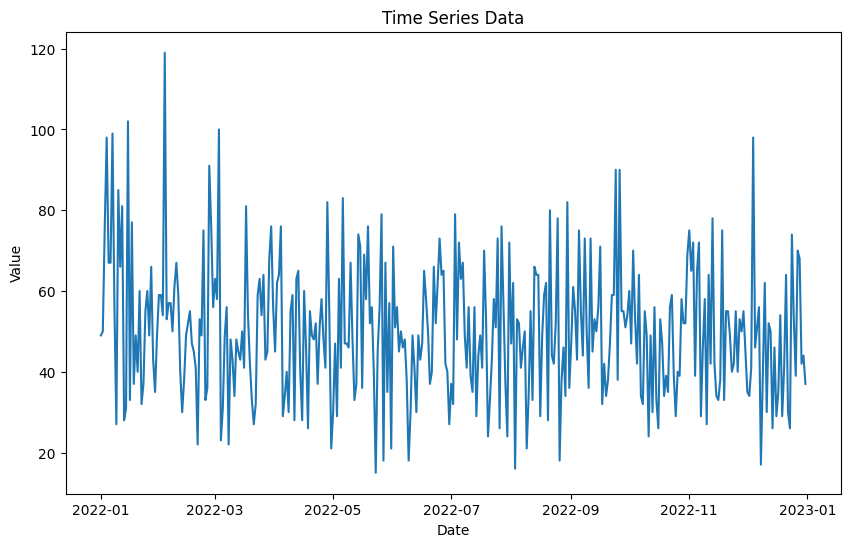

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(df)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [21]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

model = ARIMA(df, order=(0,1,1))
model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [22]:
# best_aic = float('inf')
# best_order = None
# for p in range(3):
#     for d in range(3):
#         for q in range(3):
#             try:
#                 model = ARIMA(df, order=(p,d,q))
#                 results = model.fit()
#                 aic = results.aic
#                 if aic < best_aic:
#                     best_aic = aic
#                     best_order = (p,d,q)
#                     print(best_aic)
#                     print('----------------')
#                     print(best_order)
#             except:
#                 continue

In [23]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                    Qty   No. Observations:                  365
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1543.289
Date:                Sun, 01 Oct 2023   AIC                           3090.577
Time:                        13:20:27   BIC                           3098.371
Sample:                    01-01-2022   HQIC                          3093.675
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9826      0.014    -71.142      0.000      -1.010      -0.956
sigma2       279.3536     20.607     13.557      0.000     238.965     319.742
Ljung-Box (L1) (Q):                   0.23   Jarque-

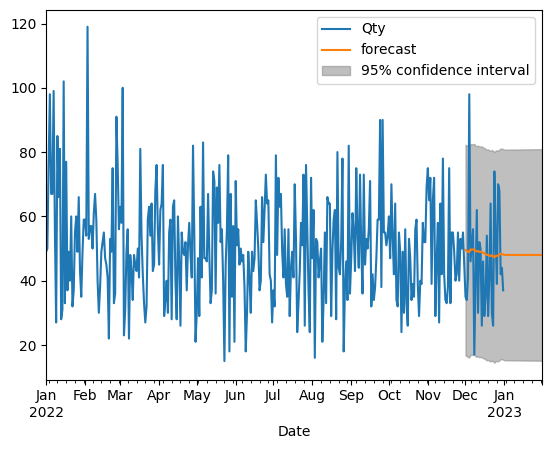

In [24]:
fig, ax = plt.subplots()
ax = df.loc['2022-01-01':].plot(ax=ax)

plot_predict(model, start='2022-12-01', end='2023-01-31', ax=ax,dynamic=False)
plt.show()